# **Project final**

## Import Libraries and Read Data Files and create additional numerical data
* This includes the data files from year 2021,2019,2018,2017 and Upto March data for year 2022
* Feature Engineering to add additional numerical features using statistics

In [315]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE



In [316]:
xls= pd.ExcelFile('/Users/nc/Documents/BWF_Latest_dataset/ZZ_0ANALYSIS_PATTERN_2021_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2021 = pd.read_excel(xls, 'Tabelle1')

In [317]:
xls1= pd.ExcelFile('/Users/nc/Documents/BWF_Latest_dataset/ZZ_0ANALYSIS_PATTERN_2019_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2019 = pd.read_excel(xls1, 'Tabelle1')

In [318]:
xls= pd.ExcelFile('/Users/nc/Documents/BWF_Latest_dataset/ZZ_0ANALYSIS_PATTERN_2020_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2020 = pd.read_excel(xls, 'Tabelle1')

In [319]:
xls= pd.ExcelFile('/Users/nc/Documents/BWF_Latest_dataset/ZZ_0ANALYSIS_PATTERN_2018_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2018 = pd.read_excel(xls, 'Tabelle1')

In [320]:
xls= pd.ExcelFile('/Users/nc/Documents/BWF_Latest_dataset/ZZ_0ANALYSIS_PATTERN_2017_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2017 = pd.read_excel(xls, 'Tabelle1')

In [321]:
xls= pd.ExcelFile('/Users/nc/Documents/BWF_Latest_dataset/Austausch TTZ-HNU_monthly/ZZ_0ANALYSIS_PATTERN_2022_Mai_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2022_1 = pd.read_excel(xls, 'Tabelle1')

In [322]:
xls= pd.ExcelFile('/Users/nc/Documents/BWF_Latest_dataset/Austausch TTZ-HNU_monthly/ZZ_0ANALYSIS_PATTERN_2022_Januar_bis_März_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2022 = pd.read_excel(xls, 'Tabelle1')

In [323]:

BWF_condensed=pd.concat([BWF_2021,BWF_2020,BWF_2019,BWF_2018,BWF_2022],axis=0)

In [324]:
BWF_condensed.describe()

,Kundenbezirk,Auftraggeber,Verkaufsbeleg,Position,K.Vers.,Angebotswert[ohne Alt.pos),Angebotswertgesamt,Gewinn\nref. Auftrag,Menge[m²],Menge\n[St],...,Gewinn HW,Bruttoergebnis KW,Herstellkosten HW,Sondereinzelkost KW,V&V,Mindestgewinn HW,Zielgewinn KW,Gewinn %,Mindestgewinn %,Zielgewinn %
count,19229.000000,19229.000000,1.922900e+04,19229.000000,19229.000000,9.265000e+03,1.922900e+04,0.0,19229.000000,19229.000000,...,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000
mean,4022.290811,321004.074887,9.151477e+06,38.410682,2.714182,9.382359e+03,1.473931e+04,NaN,3702.076635,3657.413116,...,2800.465705,5555.735956,8175.970220,973.946571,2755.269408,1946.137243,3459.062422,22.429716,-88.553903,25.395600
std,14.648183,13517.563868,2.462241e+04,42.758930,2.466176,2.704077e+04,3.305219e+04,NaN,13752.509670,13735.756094,...,7368.962649,12769.419245,19343.337711,2859.290942,6600.079701,5774.890833,8103.569583,18.205811,10198.406506,14.697635
min,4003.000000,300007.000000,9.108786e+06,5.000000,1.000000,-1.826880e+03,-1.826880e+03,NaN,-24.000000,-24.000000,...,-114700.000000,-61600.000000,-1385.760000,-188.400000,-485.040000,-20051.270000,-7190.000000,-828.000000,-999999.000000,-53.000000
25%,4003.000000,309818.000000,9.127774e+06,10.000000,1.000000,1.431500e+03,2.637450e+03,NaN,247.500000,200.000000,...,500.000000,958.250000,1387.920000,30.000000,367.140000,330.000000,600.000000,15.000000,10.000000,15.000000
50%,4027.000000,318646.000000,9.155842e+06,30.000000,2.000000,3.980000e+03,6.690000e+03,NaN,1000.000000,1000.000000,...,1300.000000,2583.000000,3590.000000,160.000000,1162.500000,800.000000,1416.000000,20.000000,10.000000,15.000000
75%,4035.000000,329298.000000,9.173334e+06,50.000000,3.000000,9.090000e+03,1.498500e+04,NaN,3010.000000,3000.000000,...,3000.000000,5840.000000,8200.000000,800.000000,2760.000000,1880.000000,3380.000000,30.000000,20.000000,31.000000
max,4045.000000,352392.000000,9.187421e+06,630.000000,39.000000,1.626000e+06,1.626000e+06,NaN,600000.000000,600000.000000,...,416000.000000,704000.000000,886999.900000,145920.000000,288000.000000,341599.990000,341599.990000,98.000000,80.000000,90.000000


In [325]:
BWF_condensed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19229 entries, 0 to 1981
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  19229 non-null  int64  
 1   Auftraggeber                  19229 non-null  int64  
 2   Land                          19229 non-null  object 
 3   Unnamed: 3                    19229 non-null  object 
 4   Kundengruppe                  19229 non-null  object 
 5   Unnamed: 5                    19229 non-null  object 
 6   Produkthier. Stufe 1          19229 non-null  object 
 7   Unnamed: 7                    19229 non-null  object 
 8   Produkthier. Stufe 2          19229 non-null  object 
 9   Unnamed: 9                    19229 non-null  object 
 10  Produkthier. Stufe 3          19229 non-null  object 
 11  Unnamed: 11                   19229 non-null  object 
 12  Produkthierarchie             19229 non-null  object 
 13  Un

In [326]:
BWF_condensed.drop(BWF_condensed.columns[[2, 5, 7,9,11,13,17,19,24,28, 30, 40,41, 44,48, 49, 50, 52]], axis = 1, inplace = True)

In [327]:
BWF_condensed.rename(columns={'Unnamed: 3':'Land'},inplace=True)

In [328]:

BWF_condensed.rename(columns={"Menge[m²]":'Menge_m2'},inplace=True)
BWF_condensed.rename(columns={"Menge[m]":'Menge_m'},inplace=True)
BWF_condensed.rename(columns={"Gewinnref. Auftrag":'Gewinnref_Auftrag'},inplace=True)
BWF_condensed.rename(columns={'Bruttoergebnis KW':'Bruttoergebnis_KW'},inplace=True)
BWF_condensed.rename(columns={'Herstellkosten HW':'Herstellkosten_HW'},inplace=True)
BWF_condensed.rename(columns={'Sondereinzelkost KW':'Sondereinzelkost_KW'},inplace=True)
BWF_condensed.rename(columns={'V&V':'V_V'},inplace=True)
BWF_condensed.rename(columns={'Mindestgewinn HW':'Mindestgewinn_HW'},inplace=True)
BWF_condensed.rename(columns={'Zielgewinn KW':'Zielgewinn_KW'},inplace=True)
BWF_condensed.rename(columns={'Gewinn %':'Gewinn_Perc'},inplace=True)
BWF_condensed.rename(columns={'Mindestgewinn %':'Mindestgewinn_perc'},inplace=True)
BWF_condensed.rename(columns={'Zielgewinn %':'Zielgewinn_perc'},inplace=True)
BWF_condensed.rename(columns={'Gewinn HW':'Gewinn_HW'},inplace=True)

In [329]:
BWF_condensed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19229 entries, 0 to 1981
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kundenbezirk                19229 non-null  int64  
 1   Auftraggeber                19229 non-null  int64  
 2   Land                        19229 non-null  object 
 3   Kundengruppe                19229 non-null  object 
 4   Produkthier. Stufe 1        19229 non-null  object 
 5   Produkthier. Stufe 2        19229 non-null  object 
 6   Produkthier. Stufe 3        19229 non-null  object 
 7   Produkthierarchie           19229 non-null  object 
 8   ABC-Klasse                  19229 non-null  object 
 9   Verkaufsbeleg               19229 non-null  int64  
 10  Incoterms                   19229 non-null  object 
 11  Zahlungsbedingung           19229 non-null  object 
 12  Position                    19229 non-null  int64  
 13  Alternativpos.              1922

In [330]:
### FInding aggregated values of financial indicaotrs

BWF_condensed_groupby=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Angebotswertgesamt.agg(Bid_Max =('max'),No_of_bids=('count'),Bid_Median=('median'), Bid_Mean=('mean'),Bid_Min=('min'))
BWF_condensed_groupby1=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Position.agg(Max_of_Item =('max'),Median_Item=('median'), Mean_of_Item=('mean'),Min_of_Item=('min'))
BWF_condensed_groupby2=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Gewinn_HW.agg(Profit_Max =('max'),Profit_median=('median'), Profit_Mean=('mean'),Profit_Min=('min'))
BWF_condensed_groupby3=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Bruttoergebnis_KW.agg(Gross_Profit_Max =('max'),Gross_Profit_Median=('median'), Gross_Profit_Mean=('mean'),Gross_Profit_Min=('min'))
BWF_condensed_groupby4=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Herstellkosten_HW.agg(COGM_LC_EUR_Max =('max'),COGM_LC_EUR_Median=('median'), COGM_LC_EUR_Mean=('mean'),COGM_LC_EUR_Min=('min'))
BWF_condensed_groupby5=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Sondereinzelkost_KW.agg(Special_dir_cost_GC_Max=('max'),Special_dir_cost_GC_Median=('median'), Special_dir_cost_GC_EUR_Mean=('mean'),Special_dir_cost_GC_EUR_Min=('min'))
BWF_condensed_groupby6=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).V_V.agg(Formula_1_EUR_Max =('max'),Formula_1_EUR_Median=('median'), Formula_1_EUR_Mean=('mean'),Formula_1_EUR_Min=('min'))
BWF_condensed_groupby7=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Mindestgewinn_HW.agg(Minimum_Profit_LC_Max =('max'),Minimum_Profit_LC_Median=('median'), Minimum_Profit_LC_Mean=('mean'),Minimum_Profit_LC_Min=('min'))
BWF_condensed_groupby8=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Zielgewinn_KW.agg(Amount_EUR_Max =('max'),Amount_EUR_Median=('median'),Amount_EUR_Mean=('mean'),Amount_EUR_Min=('min'))
BWF_condensed_groupby9=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Gewinn_Perc.agg(Profit_perc_Max =('max'),Profit_perc_Median=('median'), Profit_perc_Mean=('mean'),Profit_perc_Min=('min'))
BWF_condensed_groupby10=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Menge_m2.agg(Menge_m2_Max =('max'),Menge_m2_Median=('median'),Menge_m2_Mean=('mean'),Menge_m2_Min=('min'))
BWF_condensed_groupby11=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Zielgewinn_perc.agg(Target_Profit_perc_Max =('max'),Target_Profit_perc_Median=('median'), Target_Profit_perc_Mean=('mean'),Target_Profit_perc_Min=('min'))
BWF_condensed_groupby12=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Mindestgewinn_perc.agg(Min_Profit_perc_Max =('max'),Min_Profit_perc_Median=('median'), Min_Profit_perc_Mean=('mean'),Min_Profit_perc_Min=('min'))
BWF_condensed_groupby13=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Menge_m.agg(Menge_m_Max =('max'),Menge_m_Median=('median'), Menge_m_Mean=('mean'),Menge_m_Mean_Min=('min'))


## Merging rows into single quotation and create dependent variable
* To avoid using duplicated quotation information.
* There are multiple data points generated for single quotations.
* It is based on the number of times the negotiation between the client and the company took place
* Dependent binary variable is created 'bi_target_value'
* Value is assigned 1 or 0 based on whether the quotation is accepted or rejected respectively.
* This is evaluated based on 'Reason of rejection key' column if it is 'PJ' that means the quotation was accepted.

In [331]:
BWF_condensed['bi_target_value'] = np.where(BWF_condensed['Reason of rejection key']=='PJ',1,0)

In [332]:
BWF_condensed['bi_target_value'].value_counts()

0    16743
1     2486
Name: bi_target_value, dtype: int64

In [333]:
BWF_condensed.head()

,Kundenbezirk,Auftraggeber,Land,Kundengruppe,Produkthier. Stufe 1,Produkthier. Stufe 2,Produkthier. Stufe 3,Produkthierarchie,ABC-Klasse,Verkaufsbeleg,...,Sondereinzelkost_KW,V_V,Mindestgewinn_HW,Zielgewinn_KW,Gewinn_Perc,Mindestgewinn_perc,Zielgewinn_perc,Reason of rejection key,Reason of rejection text,bi_target_value
0,4003,300232,Frankreich,25,BELEUCHTUNG,außen,Verkehr und Infrastr,040100002000150,CC,9181118,...,4860.0,5835.0,3670.0,9180.0,22,12,25,#,#,0
1,4003,300232,Frankreich,25,BELEUCHTUNG,außen,Verkehr und Infrastr,040100002000150,CC,9181118,...,8760.0,10080.0,6390.0,15970.0,22,12,25,PJ,Auftrag erhalten,1
2,4003,300232,Frankreich,25,KUNSTSTOFFHÄNDLER UN,Händler,Händler Beleuchtung,040400001000401,CC,9168207,...,281.5,321.5,29.5,220.0,21,2,12,PJ,#,1
3,4003,300232,Frankreich,25,KUNSTSTOFFHÄNDLER UN,Händler,Händler Beleuchtung,040400001000401,CC,9172487,...,549.0,747.0,378.0,603.0,18,10,15,#,#,0
4,4003,300232,Frankreich,25,KUNSTSTOFFHÄNDLER UN,Händler,Händler Beleuchtung,040400001000401,CC,9180311,...,1554.0,1296.0,-2254.0,-1972.0,35,-54,-44,#,#,0


In [334]:
##merging multiple records into 1 based on sales document and material
BWF_condensed1=BWF_condensed.sort_values(["Verkaufsbeleg"])
BWF_condensed1["id"] = BWF_condensed1.index + 1
BWF_condensed1["rank"] = BWF_condensed1.groupby(["Verkaufsbeleg","Material",'bi_target_value'])["id"].rank("dense", ascending=True)
idx = BWF_condensed1.groupby(["Verkaufsbeleg","Material",'bi_target_value'])['rank'].transform(min) == BWF_condensed1['rank']
BWF_condensed1=BWF_condensed1[idx]

In [335]:
## Recheck it once again
BWF_condensed2=BWF_condensed1.groupby(["Verkaufsbeleg","Material"]).filter(lambda g: (g.bi_target_value != 1).all())

In [336]:
BWF_condensed1 = BWF_condensed1[BWF_condensed1.bi_target_value == 1]

In [337]:
BWF_condensed1=pd.concat([BWF_condensed1,BWF_condensed2],axis=0)

In [338]:
BWF_condensed1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 4585 to 1765
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kundenbezirk                8766 non-null   int64  
 1   Auftraggeber                8766 non-null   int64  
 2   Land                        8766 non-null   object 
 3   Kundengruppe                8766 non-null   object 
 4   Produkthier. Stufe 1        8766 non-null   object 
 5   Produkthier. Stufe 2        8766 non-null   object 
 6   Produkthier. Stufe 3        8766 non-null   object 
 7   Produkthierarchie           8766 non-null   object 
 8   ABC-Klasse                  8766 non-null   object 
 9   Verkaufsbeleg               8766 non-null   int64  
 10  Incoterms                   8766 non-null   object 
 11  Zahlungsbedingung           8766 non-null   object 
 12  Position                    8766 non-null   int64  
 13  Alternativpos.              87

In [339]:
BWF_condensed1.groupby(['bi_target_value']).size()

bi_target_value
0    7198
1    1568
dtype: int64

In [340]:
BWF_condensed1.head()

,Kundenbezirk,Auftraggeber,Land,Kundengruppe,Produkthier. Stufe 1,Produkthier. Stufe 2,Produkthier. Stufe 3,Produkthierarchie,ABC-Klasse,Verkaufsbeleg,...,Mindestgewinn_HW,Zielgewinn_KW,Gewinn_Perc,Mindestgewinn_perc,Zielgewinn_perc,Reason of rejection key,Reason of rejection text,bi_target_value,id,rank
4585,4043,307186,Schweiz,25,TECHNISCHE ANWENDUNG,TECHNISCHE ANWENDUNG,Sonstiges,040300001000399,CC,9116792,...,560.00,880.0,37,10,15,PJ,Auftrag erhalten,1,4586,1.0
4352,4042,310051,Polen,20,BELEUCHTUNG,außen,Lichtwerbung,040100002000152,BB,9118422,...,1250.00,1950.0,15,10,15,PJ,Auftrag erhalten,1,4353,1.0
772,4003,315892,Belgien,10,BELEUCHTUNG,innen,Büro und Kommunikati,040100001000101,BC,9118806,...,2325.00,5700.0,20,12,25,PJ,Auftrag erhalten,1,773,1.0
1753,4003,335963,Frankreich,01,BELEUCHTUNG,innen,Büro und Kommunikati,040100001000101,BD,9119895,...,1100.00,1800.0,20,10,15,PJ,Auftrag erhalten,1,1754,1.0
3989,4035,327418,Österreich,10,Nicht zugeordnet,Nicht zugeordnet,Nicht zugeordnet,#,CC,9121200,...,112.32,317.2,61,36,61,PJ,Auftrag erhalten,1,3990,1.0


In [341]:
BWF_condensed1.drop(BWF_condensed1.columns[[21,22,23,32,33,34,45,46, 48, 49,13]], axis = 1, inplace = True)

## Adding additional financial param
* We will join the additional featues created in step 1 to the original dataframe

In [342]:
BWF_condensed_groupby.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8766 entries, (9108786, '355103') to (9187421, 'AG_WK')
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bid_Max     8766 non-null   float64
 1   No_of_bids  8766 non-null   int64  
 2   Bid_Median  8766 non-null   float64
 3   Bid_Mean    8766 non-null   float64
 4   Bid_Min     8766 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 462.6+ KB


In [343]:
## Merging financial indicators aggregated values and original dataframe
BWF_condensed2 = pd.merge(BWF_condensed1,BWF_condensed_groupby, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed3 = pd.merge(BWF_condensed2,BWF_condensed_groupby1, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed4 = pd.merge(BWF_condensed3,BWF_condensed_groupby2, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed5 = pd.merge(BWF_condensed4,BWF_condensed_groupby3, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed6 = pd.merge(BWF_condensed5,BWF_condensed_groupby4, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed7 = pd.merge(BWF_condensed6,BWF_condensed_groupby5, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed8 = pd.merge(BWF_condensed7,BWF_condensed_groupby6, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed9 = pd.merge(BWF_condensed8,BWF_condensed_groupby7, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed10 = pd.merge(BWF_condensed9,BWF_condensed_groupby8, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed11 = pd.merge(BWF_condensed10,BWF_condensed_groupby9, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed12 = pd.merge(BWF_condensed11,BWF_condensed_groupby10, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed13 = pd.merge(BWF_condensed12,BWF_condensed_groupby11, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed14 = pd.merge(BWF_condensed13,BWF_condensed_groupby12, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed15 = pd.merge(BWF_condensed14,BWF_condensed_groupby13, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])


In [344]:
BWF_condensed15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 0 to 8765
Data columns (total 96 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8766 non-null   int64  
 1   Auftraggeber                  8766 non-null   int64  
 2   Land                          8766 non-null   object 
 3   Kundengruppe                  8766 non-null   object 
 4   Produkthier. Stufe 1          8766 non-null   object 
 5   Produkthier. Stufe 2          8766 non-null   object 
 6   Produkthier. Stufe 3          8766 non-null   object 
 7   Produkthierarchie             8766 non-null   object 
 8   ABC-Klasse                    8766 non-null   object 
 9   Verkaufsbeleg                 8766 non-null   int64  
 10  Incoterms                     8766 non-null   object 
 11  Zahlungsbedingung             8766 non-null   object 
 12  Position                      8766 non-null   int64  
 13  Pro

## handling outliers
* Outliers are calculated using Mean of price offered to the client
* The data points that lies above or below 3 stnadard deviation are marked as outliers
* All the outliers are dropped from the dataframe

In [345]:
from numpy import mean
from numpy import std
# calculate summary statistics
data_mean, data_std = mean(BWF_condensed15['Bid_Mean']), std(BWF_condensed15['Bid_Mean'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [346]:
print(data_mean)
print(data_std)

13417.445251361023
31843.635998811125


In [347]:
outliers = [x for x in BWF_condensed15['Bid_Mean'] if x < lower or x > upper]

In [348]:
outliers = [x for x in BWF_condensed15['Bid_Mean'] if x < lower or x > upper]
##BWF_condensed11['outlier']=True
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in BWF_condensed15['Bid_Mean'] if x >= lower and x <= upper]
##BWF_condensed11['outlier']=False
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 111
Non-outlier observations: 8655


In [349]:
conditions = [
    (BWF_condensed15['Bid_Mean'] > upper) | (BWF_condensed15['Bid_Mean'] < lower),
    (BWF_condensed15['Bid_Mean'] < upper) | (BWF_condensed15['Bid_Mean'] > lower)
       ]

values = [True,False]

BWF_condensed15['outlier'] = np.select(conditions, values)

In [350]:
BWF_condensed15.groupby(['bi_target_value','outlier']).size()

bi_target_value  outlier
0                0          7101
                 1            97
1                0          1554
                 1            14
dtype: int64

In [351]:
# get names of indexes for which
# column outlier has value True
index_names = BWF_condensed15[ BWF_condensed15['outlier'] == True ].index
  
# drop these row indexes
# from dataFrame
BWF_condensed15.drop(index_names, inplace = True)
  
BWF_condensed15.groupby(['bi_target_value','outlier']).size()

bi_target_value  outlier
0                0          7101
1                0          1554
dtype: int64

## Dividing data into dependent and independent variables
* 'bi_target_vlaue' will be our dependent variable

In [352]:
X = BWF_condensed15.iloc[:, 0:96]
X

,Kundenbezirk,Auftraggeber,Land,Kundengruppe,Produkthier. Stufe 1,Produkthier. Stufe 2,Produkthier. Stufe 3,Produkthierarchie,ABC-Klasse,Verkaufsbeleg,...,Target_Profit_perc_Mean,Target_Profit_perc_Min,Min_Profit_perc_Max,Min_Profit_perc_Median,Min_Profit_perc_Mean,Min_Profit_perc_Min,Menge_m_Max,Menge_m_Median,Menge_m_Mean,Menge_m_Mean_Min
0,4043,307186,Schweiz,25,TECHNISCHE ANWENDUNG,TECHNISCHE ANWENDUNG,Sonstiges,040300001000399,CC,9116792,...,15.0,15,10,10.0,10.0,10,3000.000,2500.000,2500.000000,2000.000
1,4042,310051,Polen,20,BELEUCHTUNG,außen,Lichtwerbung,040100002000152,BB,9118422,...,15.0,15,10,10.0,10.0,10,10000.000,3000.000,4200.000000,1000.000
2,4003,315892,Belgien,10,BELEUCHTUNG,innen,Büro und Kommunikati,040100001000101,BC,9118806,...,25.0,25,12,12.0,12.0,12,10000.000,4000.000,4642.857143,1000.000
3,4003,335963,Frankreich,01,BELEUCHTUNG,innen,Büro und Kommunikati,040100001000101,BD,9119895,...,15.0,15,10,10.0,10.0,10,10000.000,4000.000,4642.857143,1000.000
4,4035,327418,Österreich,10,Nicht zugeordnet,Nicht zugeordnet,Nicht zugeordnet,#,CC,9121200,...,61.0,61,36,36.0,36.0,36,38.241,38.241,38.241000,38.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,4035,311367,Slowakei,11,BELEUCHTUNG,innen,Bus und Bahn,040100001000110,AA,9187392,...,15.0,15,10,10.0,10.0,10,3000.000,2000.000,2000.000000,1000.000
8762,4035,311367,Slowakei,11,Nicht zugeordnet,Nicht zugeordnet,Nicht zugeordnet,#,AA,9187392,...,15.0,15,-99,-99.0,-99.0,-99,1.000,1.000,1.000000,1.000
8763,4042,312710,Polen,10,BELEUCHTUNG,innen,Büro und Kommunikati,040100001000101,CC,9187421,...,15.0,15,10,10.0,10.0,10,5000.000,2500.000,2833.333333,1000.000
8764,4042,312710,Polen,10,Nicht zugeordnet,Nicht zugeordnet,Nicht zugeordnet,#,CC,9187421,...,15.0,15,-99,-99.0,-99.0,-99,1.000,1.000,1.000000,1.000


In [353]:
X=X.reset_index()

In [354]:
BWF_condensed14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 0 to 8765
Data columns (total 92 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8766 non-null   int64  
 1   Auftraggeber                  8766 non-null   int64  
 2   Land                          8766 non-null   object 
 3   Kundengruppe                  8766 non-null   object 
 4   Produkthier. Stufe 1          8766 non-null   object 
 5   Produkthier. Stufe 2          8766 non-null   object 
 6   Produkthier. Stufe 3          8766 non-null   object 
 7   Produkthierarchie             8766 non-null   object 
 8   ABC-Klasse                    8766 non-null   object 
 9   Verkaufsbeleg                 8766 non-null   int64  
 10  Incoterms                     8766 non-null   object 
 11  Zahlungsbedingung             8766 non-null   object 
 12  Position                      8766 non-null   int64  
 13  Pro

In [355]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         8655 non-null   int64  
 1   Kundenbezirk                  8655 non-null   int64  
 2   Auftraggeber                  8655 non-null   int64  
 3   Land                          8655 non-null   object 
 4   Kundengruppe                  8655 non-null   object 
 5   Produkthier. Stufe 1          8655 non-null   object 
 6   Produkthier. Stufe 2          8655 non-null   object 
 7   Produkthier. Stufe 3          8655 non-null   object 
 8   Produkthierarchie             8655 non-null   object 
 9   ABC-Klasse                    8655 non-null   object 
 10  Verkaufsbeleg                 8655 non-null   int64  
 11  Incoterms                     8655 non-null   object 
 12  Zahlungsbedingung             8655 non-null   object 
 13  Pos

In [356]:
X.drop(X.columns[[0]], axis = 1, inplace = True)

In [357]:
y = BWF_condensed15.iloc[:,38].reset_index()
y

,index,bi_target_value
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
8650,8761,0
8651,8762,0
8652,8763,0
8653,8764,0


In [358]:
y.drop(y.columns[[0]], axis = 1, inplace = True)

In [359]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 96 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8655 non-null   int64  
 1   Auftraggeber                  8655 non-null   int64  
 2   Land                          8655 non-null   object 
 3   Kundengruppe                  8655 non-null   object 
 4   Produkthier. Stufe 1          8655 non-null   object 
 5   Produkthier. Stufe 2          8655 non-null   object 
 6   Produkthier. Stufe 3          8655 non-null   object 
 7   Produkthierarchie             8655 non-null   object 
 8   ABC-Klasse                    8655 non-null   object 
 9   Verkaufsbeleg                 8655 non-null   int64  
 10  Incoterms                     8655 non-null   object 
 11  Zahlungsbedingung             8655 non-null   object 
 12  Position                      8655 non-null   int64  
 13  Pro

In [360]:
X['new_col']=X['Zielgewinn_perc']-X['Gewinn_Perc']

In [361]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8655 non-null   int64  
 1   Auftraggeber                  8655 non-null   int64  
 2   Land                          8655 non-null   object 
 3   Kundengruppe                  8655 non-null   object 
 4   Produkthier. Stufe 1          8655 non-null   object 
 5   Produkthier. Stufe 2          8655 non-null   object 
 6   Produkthier. Stufe 3          8655 non-null   object 
 7   Produkthierarchie             8655 non-null   object 
 8   ABC-Klasse                    8655 non-null   object 
 9   Verkaufsbeleg                 8655 non-null   int64  
 10  Incoterms                     8655 non-null   object 
 11  Zahlungsbedingung             8655 non-null   object 
 12  Position                      8655 non-null   int64  
 13  Pro

In [362]:
## Cancatenating quotation id with item number
BWF_condensed13['Verkaufsbeleg'] = BWF_condensed13['Verkaufsbeleg'].astype(str)
BWF_condensed13['Material'] = BWF_condensed13['Material'].astype(str)
BWF_condensed13['Quotation_id']=BWF_condensed13['Verkaufsbeleg']+'-'+BWF_condensed13['Material']

In [363]:
BWF_condensed13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 0 to 8765
Data columns (total 89 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8766 non-null   int64  
 1   Auftraggeber                  8766 non-null   int64  
 2   Land                          8766 non-null   object 
 3   Kundengruppe                  8766 non-null   object 
 4   Produkthier. Stufe 1          8766 non-null   object 
 5   Produkthier. Stufe 2          8766 non-null   object 
 6   Produkthier. Stufe 3          8766 non-null   object 
 7   Produkthierarchie             8766 non-null   object 
 8   ABC-Klasse                    8766 non-null   object 
 9   Verkaufsbeleg                 8766 non-null   object 
 10  Incoterms                     8766 non-null   object 
 11  Zahlungsbedingung             8766 non-null   object 
 12  Position                      8766 non-null   int64  
 13  Pro

## Handling categorical variable
* Identified most important categorical variables are utilized.

In [364]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8655 non-null   int64  
 1   Auftraggeber                  8655 non-null   int64  
 2   Land                          8655 non-null   object 
 3   Kundengruppe                  8655 non-null   object 
 4   Produkthier. Stufe 1          8655 non-null   object 
 5   Produkthier. Stufe 2          8655 non-null   object 
 6   Produkthier. Stufe 3          8655 non-null   object 
 7   Produkthierarchie             8655 non-null   object 
 8   ABC-Klasse                    8655 non-null   object 
 9   Verkaufsbeleg                 8655 non-null   int64  
 10  Incoterms                     8655 non-null   object 
 11  Zahlungsbedingung             8655 non-null   object 
 12  Position                      8655 non-null   int64  
 13  Pro

In [365]:
X.rename(columns={"ABC-Klasse":'ABC_Klasse'},inplace=True)
X.rename(columns={"k.SchwGrad":'k_SchwGrad'},inplace=True)

##X.rename(columns={"Produkthier. Stufe 1":'Produkthier_Stufe_1'},inplace=True)
X.rename(columns={"Optische Eigenschaft":'Optische_Eigenschaft'},inplace=True)

In [366]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8655 non-null   int64  
 1   Auftraggeber                  8655 non-null   int64  
 2   Land                          8655 non-null   object 
 3   Kundengruppe                  8655 non-null   object 
 4   Produkthier. Stufe 1          8655 non-null   object 
 5   Produkthier. Stufe 2          8655 non-null   object 
 6   Produkthier. Stufe 3          8655 non-null   object 
 7   Produkthierarchie             8655 non-null   object 
 8   ABC_Klasse                    8655 non-null   object 
 9   Verkaufsbeleg                 8655 non-null   int64  
 10  Incoterms                     8655 non-null   object 
 11  Zahlungsbedingung             8655 non-null   object 
 12  Position                      8655 non-null   int64  
 13  Pro

In [367]:
## One Hot encoding
##One-hot encoding
dummies=pd.get_dummies(X['ABC_Klasse'])
X.drop(X.columns[[1,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]], axis = 1, inplace = True)
X=pd.concat([X,dummies],axis=1)
X.head()

,Kundenbezirk,Land,Incoterms,k_SchwGrad,Optische_Eigenschaft,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,...,BC,BD,C,CA,CB,CC,CD,D,DD,NK
0,4043,Schweiz,DAP,2,#,10680.00,2,9310.00,9310.000000,7940.00,...,0,0,0,0,0,1,0,0,0,0
1,4042,Polen,X30,2,#,24200.00,5,8460.00,11156.000000,3970.00,...,0,0,0,0,0,0,0,0,0,0
2,4003,Belgien,CIP,3,#,27700.00,7,12000.00,13723.571429,4210.00,...,1,0,0,0,0,0,0,0,0,0
3,4003,Frankreich,CPT,2,#,12700.00,7,5800.00,6520.714286,2380.00,...,0,1,0,0,0,0,0,0,0,0
4,4035,Österreich,X23,4,2,529.36,1,529.36,529.360000,529.36,...,0,0,0,0,0,1,0,0,0,0


In [368]:
##X.drop(X.columns[[0,1]], axis = 1, inplace = True)

In [369]:
##One Hot encoding
##One-hot encoding
dummies=pd.get_dummies(X['Land'])
X.drop(X.columns[[1]], axis = 1, inplace = True)
X=pd.concat([X,dummies],axis=1)
X.head()

,Kundenbezirk,Incoterms,k_SchwGrad,Optische_Eigenschaft,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,Max_of_Item,...,Tschechische Re,Tunesien,Türkei,USA,Ukraine,Ungarn,United Kingdom,Ver.Arab.Emir.,Weissrussland,Österreich
0,4043,DAP,2,#,10680.00,2,9310.00,9310.000000,7940.00,80,...,0,0,0,0,0,0,0,0,0,0
1,4042,X30,2,#,24200.00,5,8460.00,11156.000000,3970.00,50,...,0,0,0,0,0,0,0,0,0,0
2,4003,CIP,3,#,27700.00,7,12000.00,13723.571429,4210.00,70,...,0,0,0,0,0,0,0,0,0,0
3,4003,CPT,2,#,12700.00,7,5800.00,6520.714286,2380.00,70,...,0,0,0,0,0,0,0,0,0,0
4,4035,X23,4,2,529.36,1,529.36,529.360000,529.36,30,...,0,0,0,0,0,0,0,0,0,1


In [370]:
##One Hot encoding
##One-hot encoding
dummies=pd.get_dummies(X['Kundenbezirk'])
X.drop(X.columns[[0]], axis = 1, inplace = True)
X=pd.concat([X,dummies],axis=1)
X.head()

,Incoterms,k_SchwGrad,Optische_Eigenschaft,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,Max_of_Item,Median_Item,...,4033,4034,4035,4037,4038,4040,4041,4042,4043,4045
0,DAP,2,#,10680.00,2,9310.00,9310.000000,7940.00,80,75.0,...,0,0,0,0,0,0,0,0,1,0
1,X30,2,#,24200.00,5,8460.00,11156.000000,3970.00,50,30.0,...,0,0,0,0,0,0,0,1,0,0
2,CIP,3,#,27700.00,7,12000.00,13723.571429,4210.00,70,40.0,...,0,0,0,0,0,0,0,0,0,0
3,CPT,2,#,12700.00,7,5800.00,6520.714286,2380.00,70,40.0,...,0,0,0,0,0,0,0,0,0,0
4,X23,4,2,529.36,1,529.36,529.360000,529.36,30,30.0,...,0,0,1,0,0,0,0,0,0,0


In [371]:
N=20

last_n_column  = X.iloc[: , -N:]

In [372]:
last_n_column

,4020,4021,4022,4024,4026,4027,4028,4030,4031,4032,4033,4034,4035,4037,4038,4040,4041,4042,4043,4045
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8651,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [373]:
##One Hot encoding
##One-hot encoding
dummies=pd.get_dummies(X['Incoterms'],prefix="Incoterms")
X.drop(X.columns[[0]], axis = 1, inplace = True)
X=pd.concat([X,dummies],axis=1)
X.head()

,k_SchwGrad,Optische_Eigenschaft,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,Max_of_Item,Median_Item,Mean_of_Item,...,Incoterms_X13,Incoterms_X14,Incoterms_X20,Incoterms_X21,Incoterms_X22,Incoterms_X23,Incoterms_X30,Incoterms_ZKA,Incoterms_ZKC,Incoterms_ZNT
0,2,#,10680.00,2,9310.00,9310.000000,7940.00,80,75.0,75.0,...,0,0,0,0,0,0,0,0,0,0
1,2,#,24200.00,5,8460.00,11156.000000,3970.00,50,30.0,30.0,...,0,0,0,0,0,0,1,0,0,0
2,3,#,27700.00,7,12000.00,13723.571429,4210.00,70,40.0,40.0,...,0,0,0,0,0,0,0,0,0,0
3,2,#,12700.00,7,5800.00,6520.714286,2380.00,70,40.0,40.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,529.36,1,529.36,529.360000,529.36,30,30.0,30.0,...,0,0,0,0,0,1,0,0,0,0


In [374]:
X = pd.concat([X, pd.get_dummies(X['k_SchwGrad'], drop_first=True, prefix="k_SchwGrad")], axis=1)
X.head()

,k_SchwGrad,Optische_Eigenschaft,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,Max_of_Item,Median_Item,Mean_of_Item,...,Incoterms_X23,Incoterms_X30,Incoterms_ZKA,Incoterms_ZKC,Incoterms_ZNT,k_SchwGrad_1,k_SchwGrad_2,k_SchwGrad_3,k_SchwGrad_4,k_SchwGrad_5
0,2,#,10680.00,2,9310.00,9310.000000,7940.00,80,75.0,75.0,...,0,0,0,0,0,0,1,0,0,0
1,2,#,24200.00,5,8460.00,11156.000000,3970.00,50,30.0,30.0,...,0,1,0,0,0,0,1,0,0,0
2,3,#,27700.00,7,12000.00,13723.571429,4210.00,70,40.0,40.0,...,0,0,0,0,0,0,0,1,0,0
3,2,#,12700.00,7,5800.00,6520.714286,2380.00,70,40.0,40.0,...,0,0,0,0,0,0,1,0,0,0
4,4,2,529.36,1,529.36,529.360000,529.36,30,30.0,30.0,...,1,0,0,0,0,0,0,0,1,0


In [375]:
X = pd.concat([X, pd.get_dummies(X['Optische_Eigenschaft'], drop_first=True, prefix="Opt")], axis=1)
X.head()

,k_SchwGrad,Optische_Eigenschaft,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,Max_of_Item,Median_Item,Mean_of_Item,...,Incoterms_ZKC,Incoterms_ZNT,k_SchwGrad_1,k_SchwGrad_2,k_SchwGrad_3,k_SchwGrad_4,k_SchwGrad_5,Opt_1,Opt_2,Opt_3
0,2,#,10680.00,2,9310.00,9310.000000,7940.00,80,75.0,75.0,...,0,0,0,1,0,0,0,0,0,0
1,2,#,24200.00,5,8460.00,11156.000000,3970.00,50,30.0,30.0,...,0,0,0,1,0,0,0,0,0,0
2,3,#,27700.00,7,12000.00,13723.571429,4210.00,70,40.0,40.0,...,0,0,0,0,1,0,0,0,0,0
3,2,#,12700.00,7,5800.00,6520.714286,2380.00,70,40.0,40.0,...,0,0,0,1,0,0,0,0,0,0
4,4,2,529.36,1,529.36,529.360000,529.36,30,30.0,30.0,...,0,0,0,0,0,1,0,0,1,0


In [376]:
X.drop(X.columns[[0,1]], axis = 1, inplace = True)

In [377]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Columns: 182 entries, Bid_Max to Opt_3
dtypes: float64(48), int64(10), uint8(124)
memory usage: 4.9 MB


In [381]:
X.head()

,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,Max_of_Item,Median_Item,Mean_of_Item,Min_of_Item,Profit_Max,...,Incoterms_ZKC,Incoterms_ZNT,k_SchwGrad_1,k_SchwGrad_2,k_SchwGrad_3,k_SchwGrad_4,k_SchwGrad_5,Opt_1,Opt_2,Opt_3
0,10680.00,2,9310.00,9310.000000,7940.00,80,75.0,75.0,70,3690.00,...,0,0,0,1,0,0,0,0,0,0
1,24200.00,5,8460.00,11156.000000,3970.00,50,30.0,30.0,10,3700.00,...,0,0,0,1,0,0,0,0,0,0
2,27700.00,7,12000.00,13723.571429,4210.00,70,40.0,40.0,10,5600.00,...,0,0,0,0,1,0,0,0,0,0
3,12700.00,7,5800.00,6520.714286,2380.00,70,40.0,40.0,10,2600.00,...,0,0,0,1,0,0,0,0,0,0
4,529.36,1,529.36,529.360000,529.36,30,30.0,30.0,30,323.44,...,0,0,0,0,0,1,0,0,1,0


## Implementing the model
* Splitting the dataset in train, test and validation dataset.
* Standardizing the data using standardscaler.
* Handling Imbalance data using under sampling and oversampling techniques
* Tested different algorithms and compared using precision and recall

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state = 0)

In [383]:
X_test, X_val, y_test,y_val  = train_test_split(X_test, y_test, test_size=0.2, random_state=0,stratify=y_test['bi_target_value'])


In [384]:
X_train.head()

,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,Max_of_Item,Median_Item,Mean_of_Item,Min_of_Item,Profit_Max,...,Incoterms_ZKC,Incoterms_ZNT,k_SchwGrad_1,k_SchwGrad_2,k_SchwGrad_3,k_SchwGrad_4,k_SchwGrad_5,Opt_1,Opt_2,Opt_3
4244,15120.00,1,15120.00,15120.000000,15120.00,10,10.0,10.0,10,1080.00,...,0,0,0,1,0,0,0,0,1,0
7577,23500.00,3,12550.00,13993.333333,5930.00,30,20.0,20.0,10,4250.00,...,0,0,0,1,0,0,0,0,1,0
2905,39920.00,2,22436.00,22436.000000,4952.00,60,55.0,55.0,50,18040.00,...,0,0,0,0,0,1,0,1,0,0
5744,6773.76,1,6773.76,6773.760000,6773.76,20,20.0,20.0,20,1182.72,...,0,0,1,0,0,0,0,0,0,0
3888,11160.00,3,6180.00,7183.333333,4210.00,30,20.0,20.0,10,2025.00,...,0,0,0,0,1,0,0,0,1,0


In [385]:
y['bi_target_value'].value_counts()

0    7101
1    1554
Name: bi_target_value, dtype: int64

In [386]:
y_train['bi_target_value'].value_counts()

0    4264
1     929
Name: bi_target_value, dtype: int64

In [387]:
y_test['bi_target_value'].value_counts()

0    2269
1     500
Name: bi_target_value, dtype: int64

In [388]:
y_val['bi_target_value'].value_counts()

0    568
1    125
Name: bi_target_value, dtype: int64

In [389]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
##scaler.fit(X_train)
X1_train=scaler.fit_transform(X_train)
X1_test=scaler.transform(X_test)
X1_val=scaler.transform(X_val)


In [390]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [391]:

##os = SMOTE(random_state=0, ratio=1)

over = SMOTE(sampling_strategy=0.5)
under=RandomUnderSampler(sampling_strategy=0.6)

In [392]:
##from imblearn.combine import SMOTETomek
##from imblearn.under_sampling import TomekLinks
##resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

In [393]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [394]:
# transform the dataset
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)


In [395]:
X_train_res

array([[-0.3915422 ,  0.45176241, -0.39168006, ..., -0.40829415,
        -0.85195219, -0.22156468],
       [ 1.95274275,  1.59615374,  0.77843205, ..., -0.40829415,
         1.17377479, -0.22156468],
       [-0.58384182, -0.69262891, -0.61372359, ...,  2.44921463,
        -0.85195219, -0.22156468],
       ...,
       [-0.60341413, -0.69262891, -0.6455822 , ..., -0.40829415,
         1.17377479, -0.22156468],
       [-0.52741453, -0.69262891, -0.52187467, ..., -0.40829415,
        -0.85195219, -0.22156468],
       [-0.56079607, -0.66606358, -0.57778926, ..., -0.40829415,
         1.17377479, -0.22156468]])

In [396]:
## Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
y_pred_logreg = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
##from sklearn.metrics import accuracy_score
##print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test,y_pred_logreg)))

Accuracy of logistic regression classifier on test set: 0.74


In [397]:
## Computing precision and recall

print(classification_report(y_test, y_pred_logreg))
## Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2269
           1       0.31      0.36      0.33       500

    accuracy                           0.74      2769
   macro avg       0.58      0.59      0.58      2769
weighted avg       0.76      0.74      0.75      2769

[[1862  407]
 [ 319  181]]


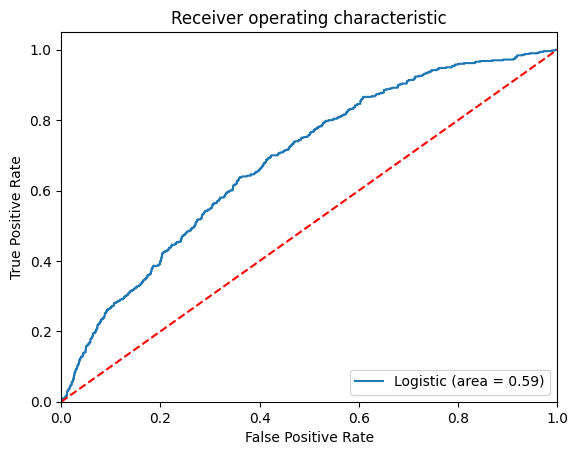

In [398]:
## ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [399]:
## Implementing random forest on Randomsampler dataset
RF=RandomForestClassifier(n_estimators=600,max_features = 'sqrt', max_depth=15, min_samples_split=5,oob_score=True,class_weight={1:3,0:1})
RF.fit(X_train_res,y_train_res)
print("oob_score",1-RF.oob_score)
y_pred_RF=RF.predict(X_test)

oob_score 0


In [400]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_RF))

Accuracy: 0.7211989888046226


In [401]:
importances = RF.feature_importances_

In [402]:
sorted_indices = np.argsort(importances)[::-1]

In [403]:
print("Feature importances in descending order:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]}")

Feature importances in descending order:
feature 69: 0.01909810649574553
feature 180: 0.01870829521812267
feature 45: 0.017705374644256106
feature 133: 0.017639938477843998
feature 52: 0.016612246729961852
feature 51: 0.016191185666324086
feature 24: 0.016118585469723737
feature 6: 0.016095181036459964
feature 8: 0.015799793375251135
feature 50: 0.015572742055490032
feature 23: 0.015568294340276326
feature 7: 0.015563691591105957
feature 21: 0.015504571110355414
feature 141: 0.015491893057739544
feature 5: 0.015265593492810915
feature 22: 0.015138358896949752
feature 57: 0.015020511124089291
feature 53: 0.01489580829745213
feature 44: 0.014640027057208498
feature 37: 0.014480592456313134
feature 55: 0.014449942368107751
feature 49: 0.014396002406788778
feature 46: 0.014341516439767738
feature 43: 0.014140352729252905
feature 39: 0.014123839516522947
feature 56: 0.014062669318731406
feature 38: 0.013941863417163004
feature 20: 0.013780722586028948
feature 54: 0.013704983859871374
featur

In [404]:
top_n = min(15, len(feature_names))

In [405]:
# Select the top 10 features
top_features = [feature_names[idx] for idx in sorted_indices[:top_n]]
top_importances = importances[sorted_indices[:top_n]]

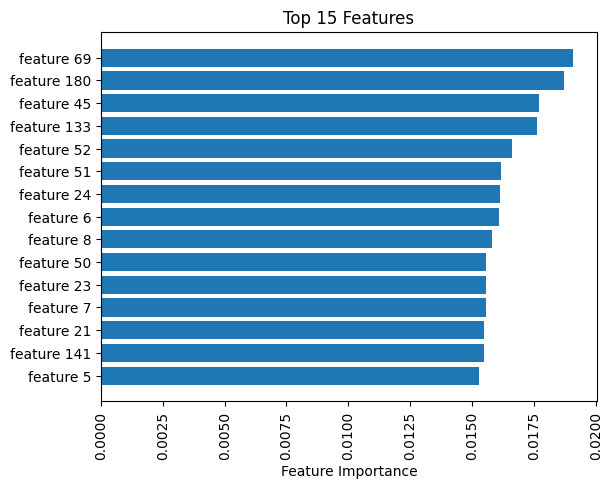

In [406]:
# Plot the top 10 features in a bar graph
plt.barh(range(top_n), top_importances[::-1], align='center')
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel('Feature Importance')
plt.title('Top 15 Features')
plt.xticks(rotation=90)
plt.show()

In [407]:
print(classification_report(y_test,y_pred_RF))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      2269
           1       0.33      0.54      0.41       500

    accuracy                           0.72      2769
   macro avg       0.61      0.65      0.61      2769
weighted avg       0.78      0.72      0.74      2769

[[1727  542]
 [ 230  270]]


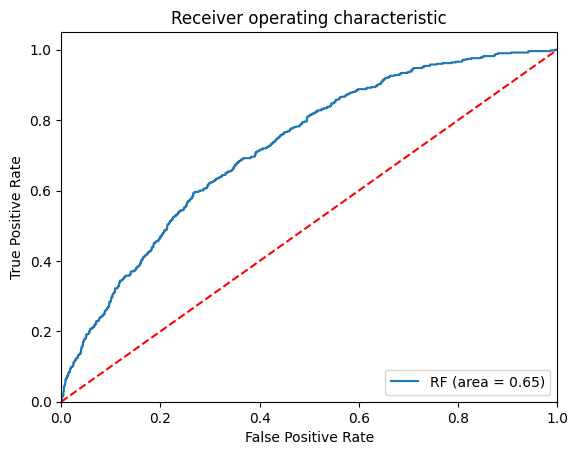

In [408]:
## ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_RF)
fpr, tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [409]:


## Implementing xg_reg
##Implementing Xgboost algorithm
from sklearn.metrics import mean_squared_error
import xgboost as xgb

xg_reg=xgb.XGBClassifier(objective = 'binary:logistic',colsample_bytree = 0.6, learning_rate =0.1,
                        max_depth=6, alpha= 10,n_estimators = 100)


In [410]:
xg_reg.fit(X_train_res, y_train_res)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [411]:
preds= xg_reg.predict(X_test)
print(classification_report(y_test,preds))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, preds)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2269
           1       0.46      0.18      0.26       500

    accuracy                           0.81      2769
   macro avg       0.65      0.57      0.58      2769
weighted avg       0.77      0.81      0.78      2769

[[2163  106]
 [ 408   92]]


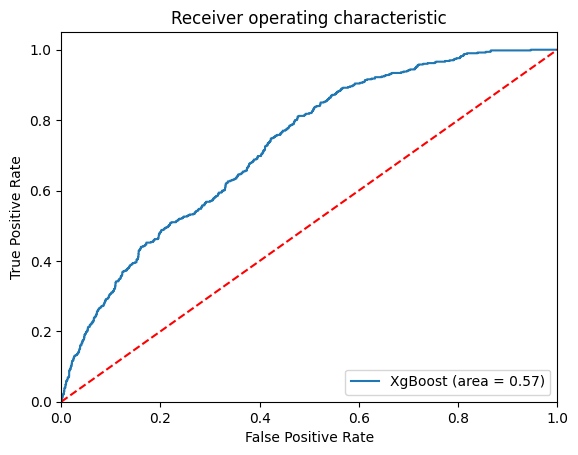

In [412]:
## ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xg_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xg_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XgBoost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Xg_ROC')
plt.show()

In [413]:
# Get feature importances
importances = xg_reg.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order and keep the top 15
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Display the top 15 feature importances
print(importance_df)

         Feature  Importance
180  feature 180    0.142318
133  feature 133    0.043635
124  feature 124    0.042002
69    feature 69    0.037581
8      feature 8    0.033353
51    feature 51    0.028909
141  feature 141    0.028797
176  feature 176    0.028272
52    feature 52    0.024781
5      feature 5    0.022808
177  feature 177    0.021344
45    feature 45    0.018396
1      feature 1    0.014730
179  feature 179    0.014536
105  feature 105    0.013951


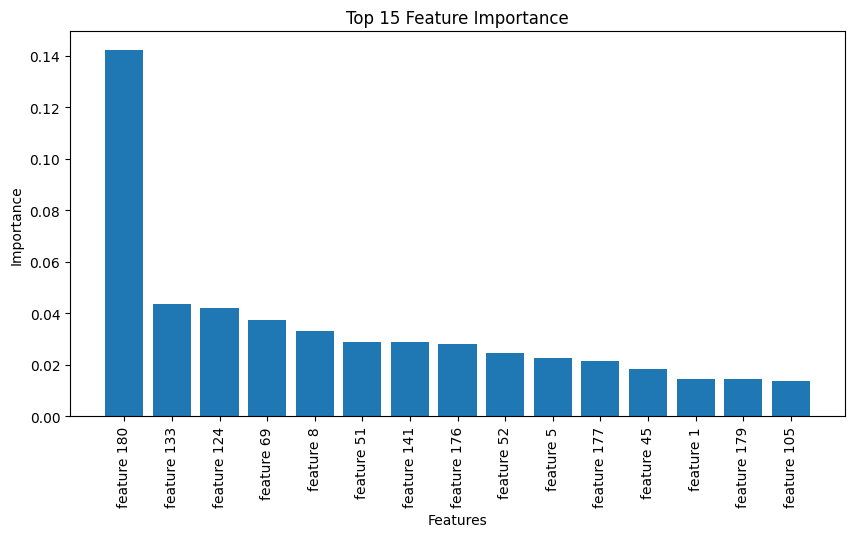

In [414]:
plt.figure(figsize=(10, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 15 Feature Importance')
plt.xticks(rotation=90)
plt.show()



In [415]:
# Get the top 15 feature names
top_features = importance_df['Feature'].values

## Feature Importance
* Feature Importance is produced using decision tree

In [417]:
## decision tree and feature importance
clf = DecisionTreeClassifier(random_state=0,class_weight=None, criterion='gini', max_depth=15,max_features=None, max_leaf_nodes=10)
clf.fit(X_train_res, y_train_res)
importance = clf.feature_importances_
y_pred = clf.predict(X_test)

In [418]:
RF.feature_importances_

array([1.22840675e-02, 9.94742322e-03, 1.21150467e-02, 1.18995419e-02,
       1.30563430e-02, 1.52655935e-02, 1.60951810e-02, 1.55636916e-02,
       1.57997934e-02, 1.33585729e-02, 1.31484881e-02, 1.32043270e-02,
       1.33373840e-02, 1.25534401e-02, 1.20645891e-02, 1.20048136e-02,
       1.30928987e-02, 1.24657853e-02, 1.25180022e-02, 1.15978203e-02,
       1.37807226e-02, 1.55045711e-02, 1.51383589e-02, 1.55682943e-02,
       1.61185855e-02, 1.12924726e-02, 1.18450025e-02, 1.19224385e-02,
       1.26670341e-02, 1.26820134e-02, 1.18943653e-02, 1.22753560e-02,
       1.34870758e-02, 1.21012387e-02, 1.19336109e-02, 1.22629872e-02,
       1.26702576e-02, 1.44805925e-02, 1.39418634e-02, 1.41238395e-02,
       1.36798694e-02, 1.28678848e-02, 1.33208830e-02, 1.41403527e-02,
       1.46400271e-02, 1.77053746e-02, 1.43415164e-02, 1.34451502e-02,
       1.36070831e-02, 1.43960024e-02, 1.55727421e-02, 1.61911857e-02,
       1.66122467e-02, 1.48958083e-02, 1.37049839e-02, 1.44499424e-02,
      

In [419]:
import time
import numpy as np

start_time = time.time()
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.082 seconds


In [420]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

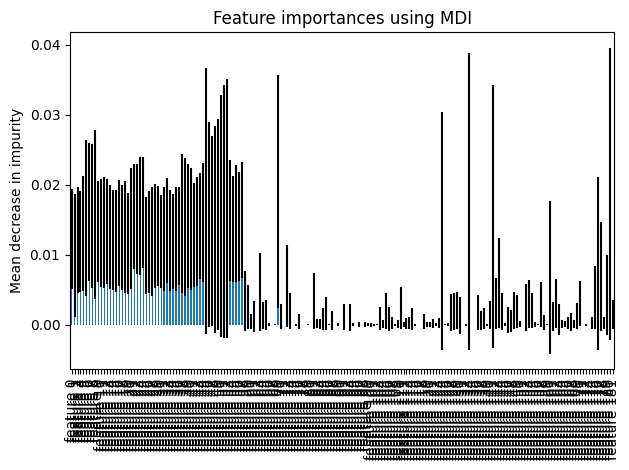

In [421]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [422]:
plt.figure(figsize=(100,100))
plt.barh(feature_names, RF.feature_importances_)

<BarContainer object of 182 artists>

In [423]:
feature_importances = pd.DataFrame(RF.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)


In [424]:
feature_importances.iloc[0:15,0:5]

,importance
CC,0.019098
Opt_2,0.018708
Target_Profit_perc_Max,0.017705
4022,0.017640
Min_Profit_perc_Min,0.016612
Min_Profit_perc_Mean,0.016191
Special_dir_cost_GC_EUR_Min,0.016119
Median_Item,0.016095
Min_of_Item,0.015800
Min_Profit_perc_Median,0.015573


In [425]:
['Target_Profit_perc_Max','Target_Profit_perc_Mean','Target_Profit_perc_Median','Min_Profit_perc_Median','Min_Profit_perc_Mean','Median_Item','Target_Profit_perc_Min','Min_Profit_perc_Max','Special_dir_cost_GC_EUR_Min','Special_dir_cost_GC_Max','Special_dir_cost_GC_Median','Menge_m_Mean','Max_of_Item','Profit_perc_Mean','Menge_m2_Min']


['Target_Profit_perc_Max',
 'Target_Profit_perc_Mean',
 'Target_Profit_perc_Median',
 'Min_Profit_perc_Median',
 'Min_Profit_perc_Mean',
 'Median_Item',
 'Target_Profit_perc_Min',
 'Min_Profit_perc_Max',
 'Special_dir_cost_GC_EUR_Min',
 'Special_dir_cost_GC_Max',
 'Special_dir_cost_GC_Median',
 'Menge_m_Mean',
 'Max_of_Item',
 'Profit_perc_Mean',
 'Menge_m2_Min']

In [426]:
X.iloc[:,69:70]

,CC
0,1
1,0
2,0
3,0
4,1
...,...
8650,0
8651,0
8652,1
8653,1


In [427]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz



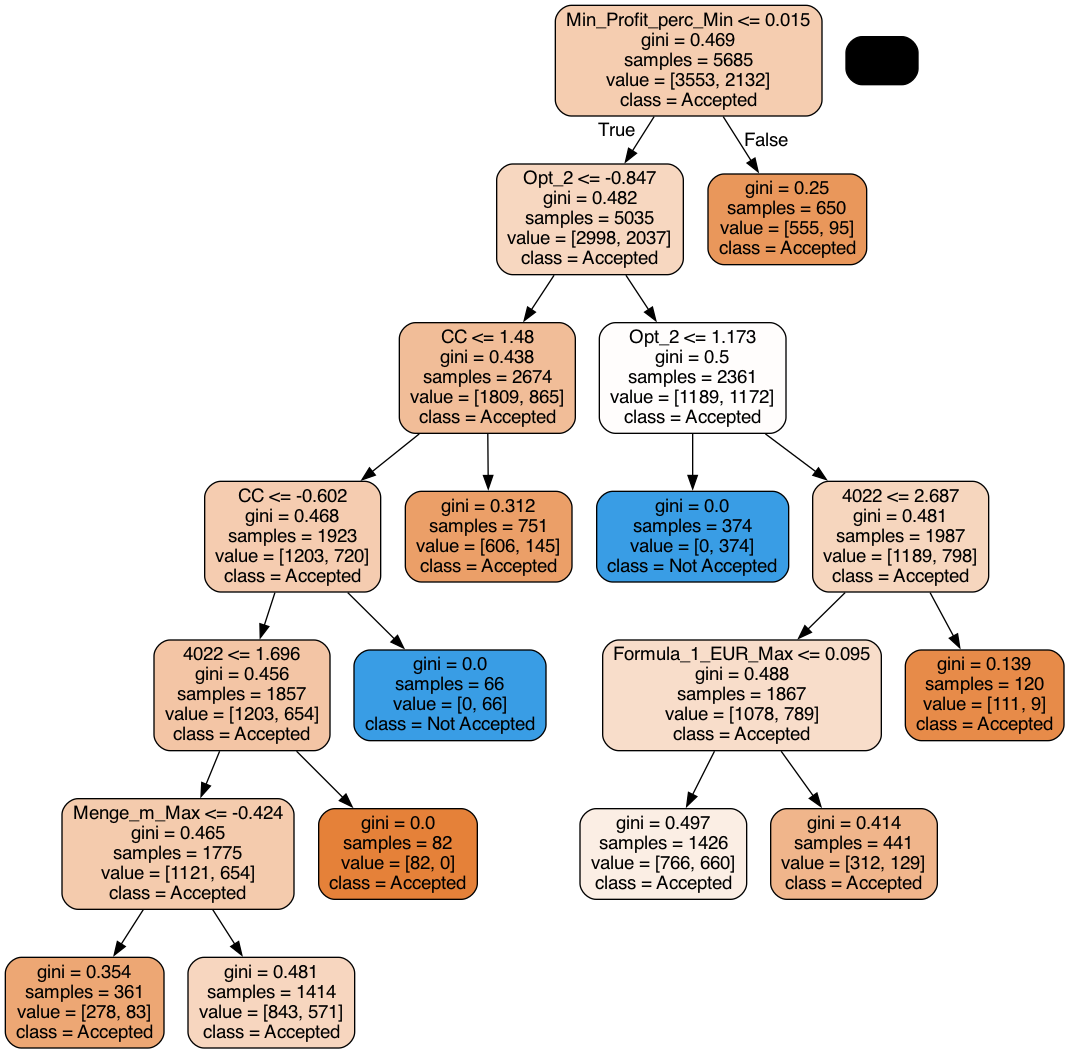

In [428]:
dot_data = StringIO()  

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=[ "Accepted",'Not Accepted'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [429]:
X.rename(columns={'Tschechische Re':'Tschechische_Re'},inplace=True)

In [430]:
##columns=['Min_Profit_perc_Min','Formula_1_EUR_Min','Profit_perc_Max','Mean_of_Item','Menge_m2_Min','Max_of_Item','Min_Profit_perc_Min','Menge_m2_Mean','Profit_Min_y','Gross_Profit_Median','Menge_m_Median','Min_of_Item','Profit_median','Menge_m2_Mean','Gross_Profit_Mean','new_col','No_of_bids','Special_dir_cost_GC_Median','Target_Profit_perc_Median','Formula_1_EUR_Median','Special_dir_cost_GC_Max','Menge_m2_Min','Target_Profit_perc_Min','Amount_EUR_Max','Gross_Profit_Mean','AA','AB','AC','AD','BA','BB','BC','BD','C','CA','CB','CC','CD','D','DD','NK','Argentinien','Australien','Belgien','Bulgarien','China','Deutschland','Dänemark','Estland','Finnland','Frankreich','Georgien','Griechenland','Honduras','Indien','Irland','Israel','Italien','Jordanien','Kanada','Kroatien','Lettland','Libanon','Liechtenstein','Litauen','Luxemburg','Malaysia','Marokko','Neuseeland','Niederlande','Norwegen','Polen','Portugal','Rumänien','Russische Foed.','Schweden','Schweiz','Serbien','Slowakei','Slowenien','Spanien','Südafrika','Thailand','Tschechische Re','Tunesien','Türkei','USA','Ukraine','Ungarn','United Kingdom','Ver.Arab.Emir.','Weissrussland','Österreich',4003,4014,4018,4020,4021,4022,4024,4026,4027,4028,4030,4031,4032,4033,4034,4035,4037,4038,4040,4041,4042,4043,'#','CIP','CPT','DAP','DDP','DDU','EXW','FCA','FH','X01','X02','X10','X11','X13','X14','X20','X21','X22','X23','X30','ZKA','ZKC','ZNT','k_SchwGrad_1','k_SchwGrad_2','k_SchwGrad_3','k_SchwGrad_4','k_SchwGrad_5','Opt__1','Opt__2','Opt__3']
##columns=['Min_Profit_perc_Min','Formula_1_EUR_Min','Profit_perc_Max','Mean_of_Item','Menge_m2_Min','Max_of_Item','Min_Profit_perc_Min','Menge_m2_Mean','Profit_Min_y','Gross_Profit_Median','Menge_m_Median','Min_of_Item','Profit_median','Menge_m2_Mean','Gross_Profit_Mean','new_col','No_of_bids','Special_dir_cost_GC_Median','Target_Profit_perc_Median','Formula_1_EUR_Median','Special_dir_cost_GC_Max','Menge_m2_Min','Target_Profit_perc_Min','Amount_EUR_Max','Gross_Profit_Mean','AA','AB','AC','AD','BA','BB','BC','BD','C','CB','CC','CD','DD','NK','Argentinien','Australien','Belgien','Bulgarien','China','Deutschland','Dänemark','Estland','Finnland','Frankreich','Georgien','Griechenland','Indien','Irland','Israel','Italien','Kanada','Kroatien','Libanon','Liechtenstein','Litauen','Luxemburg','Malaysia','Marokko','Neuseeland','Niederlande','Norwegen','Polen','Portugal','Rumänien','Schweden','Schweiz','Serbien','Slowakei','Slowenien','Spanien','Südafrika','Thailand','Tschechische Re','Tunesien','Türkei','USA','Ukraine','Ungarn','United Kingdom','Ver.Arab.Emir.','Weissrussland','Österreich',4003,4014,4018,4020,4021,4022,4024,4027,4028,4030,4031,4032,4033,4034,4035,4037,4038,4040,4041,4042,4043,'CIP','CPT','DAP','DDP','EXW','FCA','FH','X01','X02','X10','X11','X13','X14','X20','X21','X22','X23','X30','ZKC','ZNT','k_SchwGrad_1','k_SchwGrad_2','k_SchwGrad_3','k_SchwGrad_4','k_SchwGrad_5','Opt__1','Opt__2','Opt__3']
##columns=['Formula_1_EUR_Min','Profit_perc_Max','Mean_of_Item','Menge_m2_Min','Max_of_Item','Min_Profit_perc_Min','Menge_m2_Mean','Profit_perc_Min','Gross_Profit_Median','Menge_m_Median','Min_of_Item','Profit_median','Menge_m2_Mean','Gross_Profit_Mean','new_col','No_of_bids','Special_dir_cost_GC_Median','Target_Profit_perc_Median','Formula_1_EUR_Median','Special_dir_cost_GC_Max','Menge_m2_Min','Target_Profit_perc_Min','Amount_EUR_Max','Gross_Profit_Mean','Opt__1','Opt__2','Opt__3']
columns=['Min_Profit_perc_Min','Formula_1_EUR_Min','Profit_perc_Max','Mean_of_Item','Menge_m2_Min','Max_of_Item','Profit_perc_Min','Gross_Profit_Median','Menge_m_Median','Min_of_Item','Profit_median','Menge_m2_Mean','Gross_Profit_Mean','No_of_bids','Special_dir_cost_GC_Median','Target_Profit_perc_Median','Formula_1_EUR_Median','Special_dir_cost_GC_Max','Menge_m2_Min','Target_Profit_perc_Min','Amount_EUR_Max','Gross_Profit_Mean','Opt_1','Opt_2','Opt_3','k_SchwGrad_1','k_SchwGrad_2','k_SchwGrad_3','k_SchwGrad_4','k_SchwGrad_5','Incoterms_#','Incoterms_CIP','Incoterms_CPT','Incoterms_DAP','Incoterms_DDP','Incoterms_DDU','Incoterms_EXW','Incoterms_FCA','Incoterms_FH','Incoterms_X01','Incoterms_X02','Incoterms_X10','Incoterms_X11','Incoterms_X13','Incoterms_X14','Incoterms_X20','Incoterms_X21','Incoterms_X22','Incoterms_X23','Incoterms_X30','Incoterms_ZKA','Incoterms_ZKC','Incoterms_ZNT','AA','AB','AC','AD','BA','BB','BC','BD','C','CA','CB','CC','CD','D','DD','NK',4003,4014,4018,4020,4021,4022,4024,4026,4027,4028,4030,4031,4032,4033,4034,4035,4037,4038,4040,4041,4042,4043,4045,'Argentinien','Australien','Belgien','Bulgarien','Bosnien-Herz.','Brasilien','China','Deutschland','Dänemark','Estland','Finnland','Frankreich','Georgien','Griechenland','Indien','Irland','Israel','Italien','Jordanien','Kanada','Kroatien','Lettland','Libanon','Liechtenstein','Litauen','Luxemburg','Malaysia','Marokko','Neuseeland','Niederlande','Norwegen','Polen','Portugal','Rumänien','Russische Foed.','Schweden','Schweiz','Serbien','Slowakei','Slowenien','Spanien','Südafrika','Taiwan','Thailand','Tunesien','Türkei','USA','Ukraine','Ungarn','United Kingdom','Ver.Arab.Emir.','Weissrussland','Österreich']
##columns = [4022,'CC','Opt_2','Target_Profit_perc_Max','Min_Profit_perc_Min','Special_dir_cost_GC_Max','Target_Profit_perc_Mean','Min_Profit_perc_Mean','Special_dir_cost_GC_EUR_Mean','Min_Profit_perc_Median','Special_dir_cost_GC_Median','Special_dir_cost_GC_EUR_Min','Mean_of_Item','Median_Item','Max_of_Item']
##X1=X[columns]
##columns=['new_col','Menge_m_Max','Menge_m_Mean_Min','Minimum_Profit_LC_Min','COGM_LC_EUR_Min','Profit_Min','Menge_m2_Mean','Menge_m_Median','new_col','Menge_m_Max','Menge_m2_Mean','Target_Profit_perc_Max','Target_Profit_perc_Mean','Target_Profit_perc_Median','Min_Profit_perc_Median','Min_Profit_perc_Mean','Median_Item','Target_Profit_perc_Min','Min_Profit_perc_Max','Special_dir_cost_GC_EUR_Min','Special_dir_cost_GC_Max','Special_dir_cost_GC_Median','Menge_m_Mean','Max_of_Item','Profit_perc_Mean','Menge_m2_Min','Opt_1','Opt_2','Opt_3','AA','AB','AC','AD','BA','BB','BC','BD','C','CA','CB','CC','CD','D','DD','NK',4003,4014,4018,4020,4021,4022,4024,4026,4027,4028,4030,4031,4032,4033,4034,4035,4037,4038,4040,4041,4042,4043,4045,'k_SchwGrad_1','k_SchwGrad_2','k_SchwGrad_3','k_SchwGrad_4','k_SchwGrad_5','Incoterms_#','Incoterms_CIP','Incoterms_CPT','Incoterms_DAP','Incoterms_DDP','Incoterms_DDU','Incoterms_EXW','Incoterms_FCA','Incoterms_FH','Incoterms_X01','Incoterms_X02','Incoterms_X10','Incoterms_X11','Incoterms_X13','Incoterms_X14','Incoterms_X20','Incoterms_X21','Incoterms_X22','Incoterms_X23','Incoterms_X30','Incoterms_ZKA','Incoterms_ZKC','Incoterms_ZNT']
##columns=['Target_Profit_perc_Max','Target_Profit_perc_Mean','Target_Profit_perc_Median','Min_Profit_perc_Median','Min_Profit_perc_Mean','Median_Item','Target_Profit_perc_Min','Min_Profit_perc_Max','Special_dir_cost_GC_EUR_Min','Special_dir_cost_GC_Max','Special_dir_cost_GC_Median','Menge_m_Mean','Opt_1','Opt_2','Opt_3','AA','AB','AC','AD','BA','BB','BC','BD','C','CA','CB','CC','CD','D','DD','NK',4003,4014,4018,4020,4021,4022,4024,4026,4027,4028,4030,4031,4032,4033,4034,4035,4037,4038,4040,4041,4042,4043,4045]
##columns=['Profit_Max','Profit_median','Profit_Mean','Profit_Min','COGM_LC_EUR_Min','Special_dir_cost_GC_Max','Special_dir_cost_GC_Median','Special_dir_cost_GC_EUR_Mean','Special_dir_cost_GC_EUR_Min','Target_Profit_perc_Min','Min_Profit_perc_Max','Min_Profit_perc_Median','Opt_1','Opt_2','Opt_3','k_SchwGrad_1','k_SchwGrad_2','k_SchwGrad_3','k_SchwGrad_4','k_SchwGrad_5','Incoterms_#','Incoterms_CIP','Incoterms_CPT','Incoterms_DAP','Incoterms_DDP','Incoterms_DDU','Incoterms_EXW','Incoterms_FCA','Incoterms_FH','Incoterms_X01','Incoterms_X02','Incoterms_X10','Incoterms_X11','Incoterms_X13','Incoterms_X14','Incoterms_X20','Incoterms_X21','Incoterms_X22','Incoterms_X23','Incoterms_X30','Incoterms_ZKA','Incoterms_ZKC','Incoterms_ZNT','AA','AB','AC','AD','BA','BB','BC','BD','C','CA','CB','CC','CD','D','DD','NK',4003,4014,4018,4020,4021,4022,4024,4026,4027,4028,4030,4031,4032,4033,4034,4035,4037,4038,4040,4041,4042,4043,4045,'Argentinien','Australien','Belgien','Bulgarien','Bosnien-Herz.','Brasilien','China','Deutschland','Dänemark','Estland','Finnland','Frankreich','Georgien','Griechenland','Indien','Irland','Israel','Italien','Jordanien','Kanada','Kroatien','Lettland','Libanon','Liechtenstein','Litauen','Luxemburg','Malaysia','Marokko','Neuseeland','Niederlande','Norwegen','Polen','Portugal','Rumänien','Russische Foed.','Schweden','Schweiz','Serbien','Slowakei','Slowenien','Spanien','Südafrika','Taiwan','Thailand','Tunesien','Türkei','USA','Ukraine','Ungarn','United Kingdom','Ver.Arab.Emir.','Weissrussland','Österreich']
X1=X[columns]

In [431]:
X.iloc[:,100:120]

,Malaysia,Marokko,Neuseeland,Niederlande,Norwegen,Polen,Portugal,Rumänien,Russische Foed.,Schweden,Schweiz,Serbien,Slowakei,Slowenien,Spanien,Südafrika,Taiwan,Thailand,Tschechische_Re,Tunesien
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8651,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8652,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8653,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [432]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size = 0.4, random_state = 0)



In [433]:
X_test, X_val, y_test,y_val  = train_test_split(X_test, y_test, test_size=0.2, random_state=0,stratify=y_test['bi_target_value'])




In [434]:
X.iloc[:,80:100]

,China,Deutschland,Dänemark,Estland,Finnland,Frankreich,Georgien,Griechenland,Indien,Irland,Israel,Italien,Jordanien,Kanada,Kroatien,Lettland,Libanon,Liechtenstein,Litauen,Luxemburg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8651,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [435]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

##X_train = sc.fit_transform(X1)

In [436]:
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)



In [437]:
##from sklearn.metrics import accuracy_score
## Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
y_pred_logreg = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
##from sklearn.metrics import accuracy_score
##print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test,y_pred_logreg)))

Accuracy of logistic regression classifier on test set: 0.75


In [438]:
## Computing precision and recall

print(classification_report(y_test, y_pred_logreg))
## Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2269
           1       0.33      0.36      0.34       500

    accuracy                           0.75      2769
   macro avg       0.59      0.60      0.59      2769
weighted avg       0.76      0.75      0.75      2769

[[1897  372]
 [ 320  180]]


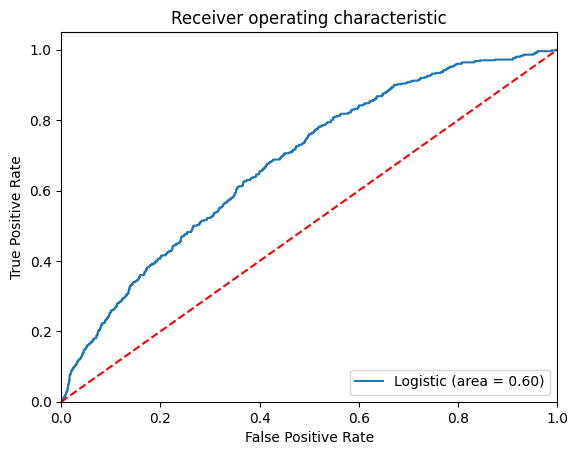

In [439]:
## ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [440]:
## Implementing random forest on Randomsampler dataset
RF=RandomForestClassifier(n_estimators=600,max_features = 'sqrt', max_depth=15, min_samples_split=5,oob_score=True,class_weight={1:3,0:1})
RF.fit(X_train_res,y_train_res)
print("oob_score",1-RF.oob_score)
y_pred_RF=RF.predict(X_test)



oob_score 0


In [441]:
print(classification_report(y_test,y_pred_RF))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.89      0.74      0.80      2269
           1       0.32      0.57      0.41       500

    accuracy                           0.71      2769
   macro avg       0.61      0.65      0.61      2769
weighted avg       0.78      0.71      0.73      2769

[[1672  597]
 [ 214  286]]


In [442]:


## Implementing xg_reg
##Implementing Xgboost algorithm
from sklearn.metrics import mean_squared_error
import xgboost as xgb

xg_reg=xgb.XGBClassifier(objective = 'binary:logistic',colsample_bytree = 0.6, learning_rate =0.1,
                        max_depth=6, alpha= 10,n_estimators = 100)


In [443]:
xg_reg.fit(X_train_res, y_train_res)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [444]:
from xgboost import plot_importance
from matplotlib import pyplot

In [445]:
preds= xg_reg.predict(X_test)
print(classification_report(y_test,preds))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, preds)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2269
           1       0.44      0.16      0.23       500

    accuracy                           0.81      2769
   macro avg       0.64      0.56      0.56      2769
weighted avg       0.77      0.81      0.77      2769

[[2169  100]
 [ 421   79]]


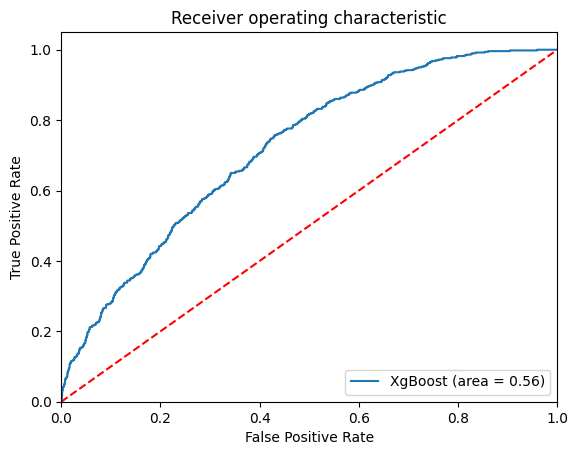

In [446]:
## ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xg_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xg_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XgBoost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Xg_ROC')
plt.show()

In [447]:
y_pred_RF1=RF.predict_proba(X_test)

In [448]:
df=pd.DataFrame(y_pred_RF1[1:,1:],
               index=y_pred_RF1[1:,0],
               columns=y_pred_RF1[0,1:])

In [449]:
df=pd.DataFrame(y_pred_RF1, columns=['prob_of_non_acceptance','prob_of_acceptance'])

In [450]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print(df)

      prob_of_non_acceptance  prob_of_acceptance
0                    0.54734             0.45266
1                    0.40867             0.59133
2                    0.66449             0.33551
3                    0.52899             0.47101
4                    0.52777             0.47223
...                      ...                 ...
2764                 0.75363             0.24637
2765                 0.56701             0.43299
2766                 0.41867             0.58133
2767                 0.56579             0.43421
2768                 0.68067             0.31933

[2769 rows x 2 columns]


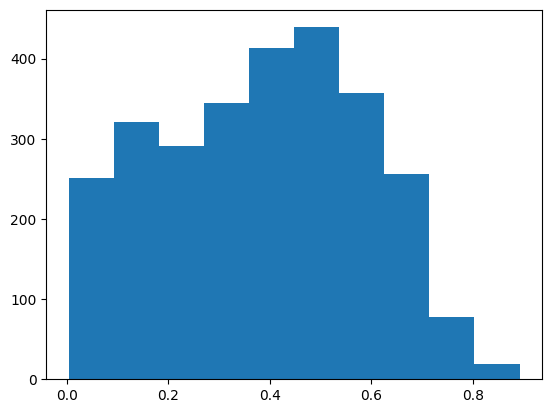

In [451]:
plt.hist(df['prob_of_acceptance'])
plt.show() 



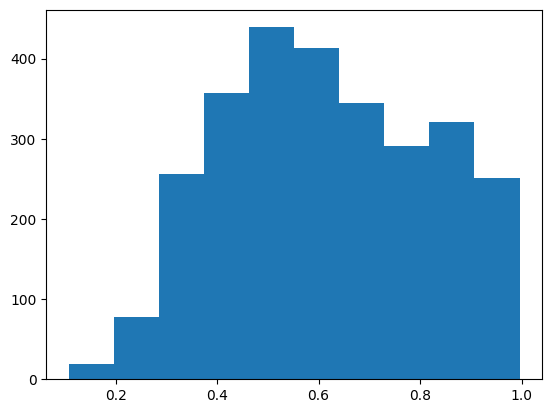

In [452]:
plt.hist(df['prob_of_non_acceptance'])
plt.show() 



In [453]:
print(classification_report(y_test,y_pred_RF))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.89      0.74      0.80      2269
           1       0.32      0.57      0.41       500

    accuracy                           0.71      2769
   macro avg       0.61      0.65      0.61      2769
weighted avg       0.78      0.71      0.73      2769

[[1672  597]
 [ 214  286]]


In [454]:
y_pred_RF=RF.predict(X_val)
print(classification_report(y_val,y_pred_RF))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred_RF)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       568
           1       0.32      0.54      0.40       125

    accuracy                           0.71       693
   macro avg       0.60      0.64      0.60       693
weighted avg       0.78      0.71      0.73       693

[[422 146]
 [ 57  68]]


In [455]:
svm.fit(X_train_res,y_train_res)
y_pred_svm = svm.predict(X_test)
print(accuracy_score(y_test,y_pred_svm))

NameError: name 'svm' is not defined

In [ ]:
print(classification_report(y_test,y_pred_svm))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_svm)
print(confusion_matrix)

In [ ]:
logreg.fit(X_train_res,y_train_res)

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix)

In [ ]:
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=6, random_state=0).fit(X_train_res, y_train_res)

In [ ]:
y_pred_bag = clf.predict(X_test)
print(classification_report(y_test,y_pred_bag))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_bag)
print(confusion_matrix)